In [14]:
import collections
import numpy as np
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl

pgf_with_custom_preamble = {
    "text.usetex": False,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
}


sns.set_style('ticks')
sns.set_context('poster')
sns.set_palette('dark', 40)

colors = sns.color_palette('dark', 40)

from scipy import interpolate

plt.rc('font', family='sans-serif')
plt.rc('text', usetex=False)
plt.rcParams['figure.figsize'] = (8, 6)
plt.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

In [106]:
file_chain_size_p = collections.defaultdict(dict)
for f in os.listdir('cycles/'):
    d = np.loadtxt('cycles/{}'.format(f))
    for l in d:
        p = float('{:.2f}'.format(l[0]/2000.0))
        if p < 0.001 or p in file_chain_size_p[f]:
            continue
        file_chain_size_p[f][p] = [i for i, p in enumerate(l[1:]) for _ in range(int(p))]

In [107]:
avg_file_chain_size_p = collections.defaultdict(list)
for f in file_chain_size_p:
    print(f, max(file_chain_size_p[f].keys()))
    for p,v  in file_chain_size_p[f].items():
        avg_file_chain_size_p[p].extend(v)

chains_p_0.001_817306_0.95_817306_traj_sim.csv 0.9
chains_p_0.001_488359_0.95_488359_traj_sim.csv 0.9
chains_p_0.001_201101_0.95_201101_traj_sim.csv 0.93
chains_p_0.001_39276_0.925_39276_traj_sim.csv 0.93
chains_p_0.001_42644_42644_traj_sim.csv 0.93
chains_p_0.001_85554_0.95_85554_traj_sim.csv 0.95
chains_p_0.001_19103_0.925_19103_traj_sim.csv 0.93
chains_p_0.001_796185_0.95_796185_traj_sim.csv 0.9
chains_p_0.001_932558_0.95_932558_traj_sim.csv 0.9
chains_p_0.001_955578_0.95_955578_traj_sim.csv 0.9


In [104]:
file_chain_size_p_noc = collections.defaultdict(dict)
for f in os.listdir('no_cycles/'):
    d = np.loadtxt('no_cycles/{}'.format(f))
    for l in d:
        p = float('{:.2f}'.format(l[0]/2000.0))
        if p < 0.001 or p in file_chain_size_p_noc[f]:
            continue
        file_chain_size_p_noc[f][p] = [i for i, p in enumerate(l[1:]) for _ in range(int(p))]

In [105]:
avg_file_chain_size_p_noc = collections.defaultdict(list)
for f in file_chain_size_p_noc:
    print(f, max(file_chain_size_p_noc[f].keys()))
    for p, v in file_chain_size_p_noc[f].items():
        avg_file_chain_size_p_noc[p].extend(v)

chains_p_0.001_564872_0.95_564872_traj_sim.csv 0.93
chains_p_0.001_450547_0.95_450547_traj_sim.csv 0.93
chains_p_0.001_471628_0.95_471628_traj_sim.csv 0.92
chains_p_0.001_290611_0.95_290611_traj_sim.csv 0.93
chains_p_0.001_159450_0.95_159450_traj_sim.csv 0.93
chains_p_0.001_525258_0.95_525258_traj_sim.csv 0.93


In [109]:
def filter_hist(n, x):
    # Get indexes where n == 0.0
    zero_idx = np.where(n == 0.0)
    # Remove those indexes
    return np.delete(n, zero_idx), np.delete(x[1:], zero_idx)

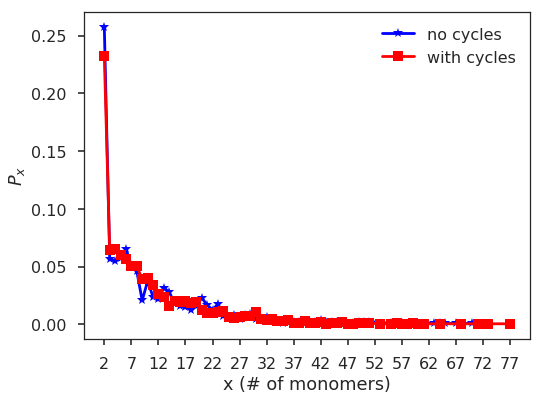

In [110]:
p = 0.9
n, x  = np.histogram(avg_file_chain_size_p_noc[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'b-', marker='*', markersize=10.0, label='no cycles')

n, x  = np.histogram(avg_file_chain_size_p[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'r-', marker='s', markersize=10.0, label='with cycles')

plt.xticks(np.arange(min(x), max(x)+5, 5.0))

plt.legend(loc=0)
plt.xlabel('x (# of monomers)')
plt.ylabel(r'$P_x$')

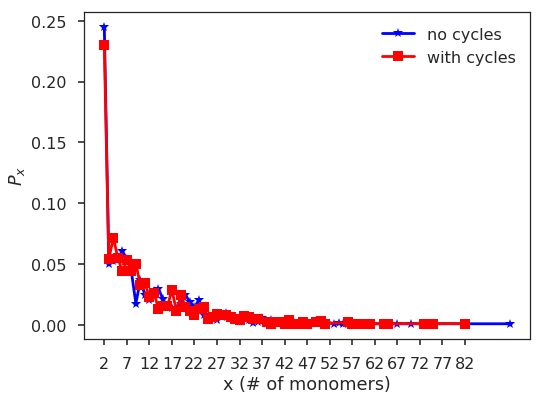

In [111]:
p = 0.91
n, x  = np.histogram(avg_file_chain_size_p_noc[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'b-', marker='*', markersize=10.0, label='no cycles')

n, x  = np.histogram(avg_file_chain_size_p[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'r-', marker='s', markersize=10.0, label='with cycles')

plt.xticks(np.arange(min(x), max(x)+5, 5.0))

plt.legend(loc=0)
plt.xlabel('x (# of monomers)')
plt.ylabel(r'$P_x$')

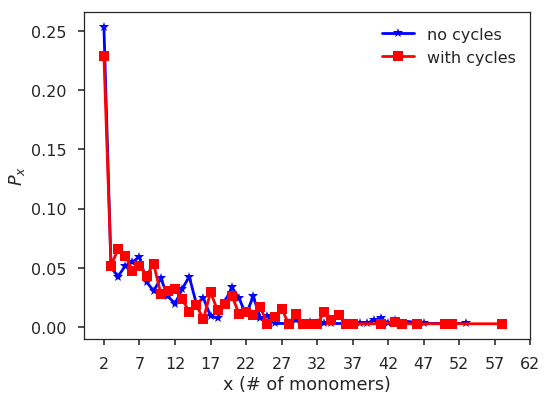

In [103]:
p = 0.93
n, x  = np.histogram(avg_file_chain_size_p_noc[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'b-', marker='*', markersize=10.0, label='no cycles')

n, x  = np.histogram(avg_file_chain_size_p[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'r-', marker='s', markersize=10.0, label='with cycles')

plt.xticks(np.arange(min(x), max(x)+5, 5.0))

plt.legend(loc=0)
plt.xlabel('x (# of monomers)')
plt.ylabel(r'$P_x$')

/home/teodor/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


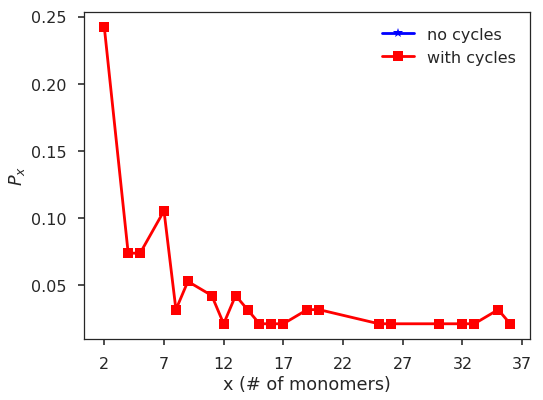

In [102]:
p = 0.95
n, x  = np.histogram(avg_file_chain_size_p_noc[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'b-', marker='*', markersize=10.0, label='no cycles')

n, x  = np.histogram(avg_file_chain_size_p[p], bins=range(0, 200), density=True)
n, x = filter_hist(n, x)
plt.plot(x, n, 'r-', marker='s', markersize=10.0, label='with cycles')

plt.xticks(np.arange(min(x), max(x)+5, 5.0))

plt.legend(loc=0)
plt.xlabel('x (# of monomers)')
plt.ylabel(r'$P_x$')